In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('sample.Jpsi.20172911.npz')

In [7]:
data.keys()

['backgroundEt_etBin_0_etaBin_3',
 'signalEfficiencies',
 'backgroundEt_etBin_0_etaBin_1',
 'backgroundEt_etBin_0_etaBin_0',
 'signalPatterns_etBin_0_etaBin_3',
 'signalPatterns_etBin_0_etaBin_2',
 'signalPatterns_etBin_0_etaBin_1',
 'signalPatterns_etBin_0_etaBin_0',
 'signalEt_etBin_2_etaBin_4',
 'signalEt_etBin_2_etaBin_1',
 'signalEt_etBin_2_etaBin_0',
 'signalEt_etBin_2_etaBin_3',
 'signalEt_etBin_2_etaBin_2',
 'signalPileUp_etBin_2_etaBin_3',
 'etBins',
 'signalEta_etBin_2_etaBin_3',
 'signalEta_etBin_2_etaBin_2',
 'signalEta_etBin_2_etaBin_1',
 'signalEta_etBin_2_etaBin_0',
 'backgroundEt_etBin_0_etaBin_2',
 'backgroundEta_etBin_0_etaBin_1',
 'backgroundEta_etBin_0_etaBin_0',
 'backgroundEta_etBin_0_etaBin_3',
 'signalPatterns_etBin_0_etaBin_4',
 'backgroundEta_etBin_0_etaBin_4',
 'signalPileUp_etBin_1_etaBin_0',
 'signalPileUp_etBin_1_etaBin_1',
 'signalPileUp_etBin_1_etaBin_2',
 'signalPileUp_etBin_1_etaBin_3',
 'signalEta_etBin_1_etaBin_2',
 'signalEta_etBin_1_etaBin_3',
 'si

In [12]:
data['signalPatterns_etBin_2_etaBin_0'].shape

(6650, 100)

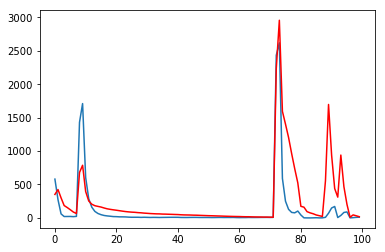

In [16]:
plt.plot(np.arange(100), np.mean(data['signalPatterns_etBin_2_etaBin_0'], axis=0))
plt.plot(np.arange(100), np.mean(data['backgroundPatterns_etBin_2_etaBin_0'], axis=0), color = 'r')
plt.show()
